In [2]:
#libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Region Based Segmentation

In [6]:
def region_segmentation(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Perform adaptive thresholding to obtain binary image
    _, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a black image to draw the segmented regions
    segmented = np.zeros_like(image)

    # Iterate over the contours and draw them on the segmented image
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.drawContours(segmented, [contour], -1, (0, 255, 0), 2)
        cv2.rectangle(segmented, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Display the original image and the segmented image
    fig, axes = plt.subplots(1, 2, figsize=(15, 8))
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
    axes[1].set_title('region Segmented ')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

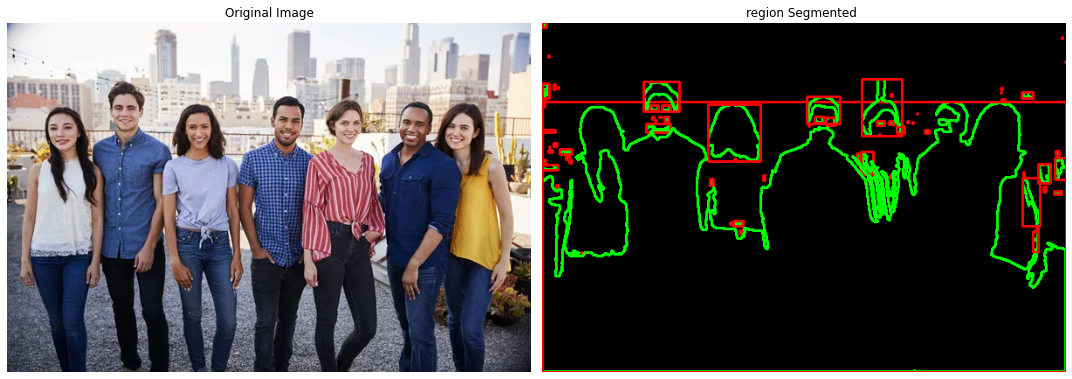

In [7]:
# Example usage
image_path = 'people.jpg'
region_segmentation(image_path)

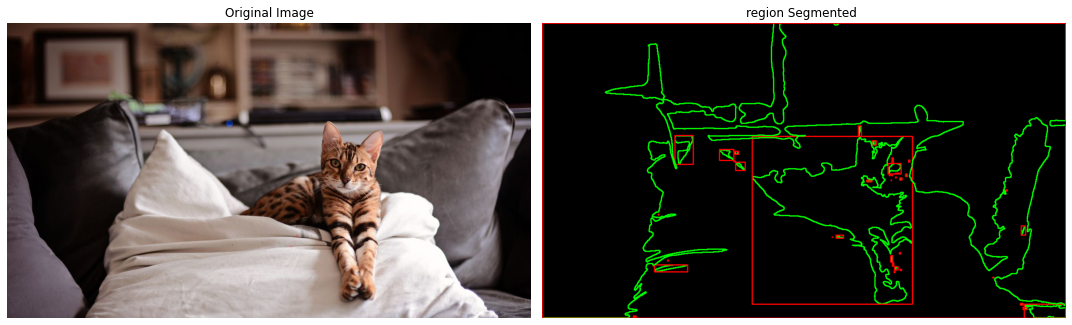

In [8]:
# Example usage
image_path = 'cat.jpg'
region_segmentation(image_path)